In [9]:
import numpy as np
from numpy.random import randint, rand
from matplotlib import pyplot as plt
from scipy.stats import norm

In [31]:
def Normal(f, var, y_0, b, n=10**4):
    """Draw a sample of length `n` from the Zipf distribution
    with exponent `alpha` on the set {1,2,...,M} using
    Metropolis-Hastings and the symmetric random-walk proposal.
    """
    def Bernoulli(p): # Draw from Bernoulli(p)
        return rand() <= p # rand() is uniform on [0,1]
    t=0 # Initialize t
    y = np.empty(n + b) # Initialize y

    y[0]= y_0 # Start at a random location

    while t < n + b - 1:
        mu = y[t]
        proposal = np.random.normal(mu, np.sqrt(var), 1)
        accept_prob = f(proposal) / f(y[t])
            
        if Bernoulli(accept_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]

        t += 1
    
    return y[b:]

In [38]:
def Uniform(f, y_0, L, b, n=10**4):
    """Draw a sample of length `n` from the Zipf distribution
    with exponent `alpha` on the set {1,2,...,M} using
    Metropolis-Hastings and the symmetric random-walk proposal.
    """
    def Bernoulli(p): # Draw from Bernoulli(p)
        return rand() <= p # rand() is uniform on [0,1]
    t=0 # Initialize t
    y = np.empty(n + b) # Initialize y

    y[0]= y_0 # Start at a random location

    while t < n + b - 1:
        proposal = np.random.uniform(y[t]-L, y[t]+L, 1)
        accept_prob = f(proposal) / f(y[t])
            
        if Bernoulli(accept_prob): # Proposal accepted
            y[t+1] = proposal
        else: # Proposal rejected
            y[t+1] = y[t]

        t += 1
    
    return y[b:]

## Problem 10.10 i

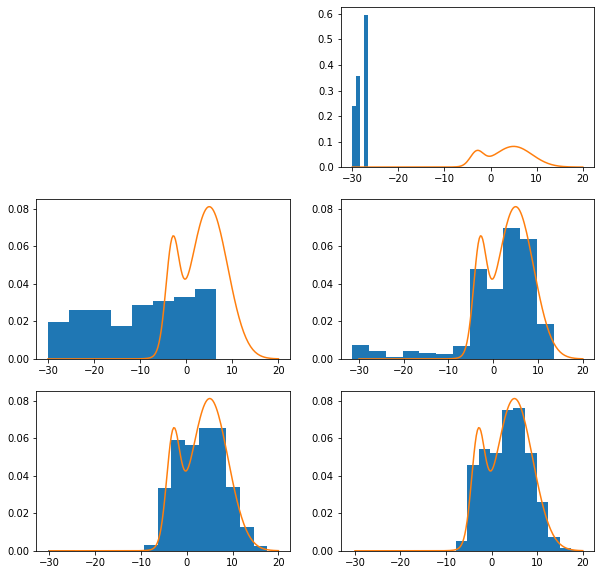

In [24]:
fig = plt.figure(figsize=(10, 10))
for k in range(1,6):
    fig.add_subplot(3,2,k+1)
    f = lambda s: 4 * np.exp((-(s+3)**2)/4) + 6 * np.exp((-(s-5)**2)/32)

    var = 1
    y_0 = -30
    n = 10**k

    y = Normal(f, var, y_0, n)
    
    plt.hist(y, bins=k*4, density=True)
    
    Z=74
    
    x = np.linspace(-30, 20, 200)
    plt.plot(x, f(x)/z)
    

## ii

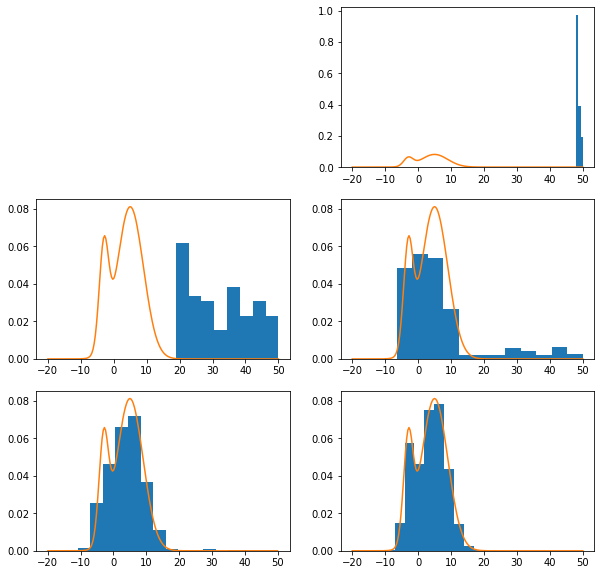

In [26]:
fig = plt.figure(figsize=(10, 10))
for k in range(1,6):
    fig.add_subplot(3,2,k+1)
    f = lambda s: 4 * np.exp((-(s+3)**2)/4) + 6 * np.exp((-(s-5)**2)/32)

    var = 1
    y_0 = 50
    n = 10**k

    y = Normal(f, var, y_0, n)
    
    plt.hist(y, bins=k*4, density=True)
    
    Z=74
    
    x = np.linspace(-20, 50, 200)
    plt.plot(x, f(x)/z)

## Burn in = 10^4. I choose this because in my plots that seems to be where it begins to match quite well with the PDF

## Problem 10.11

ValueError: num must be 1 <= num <= 20, not 21

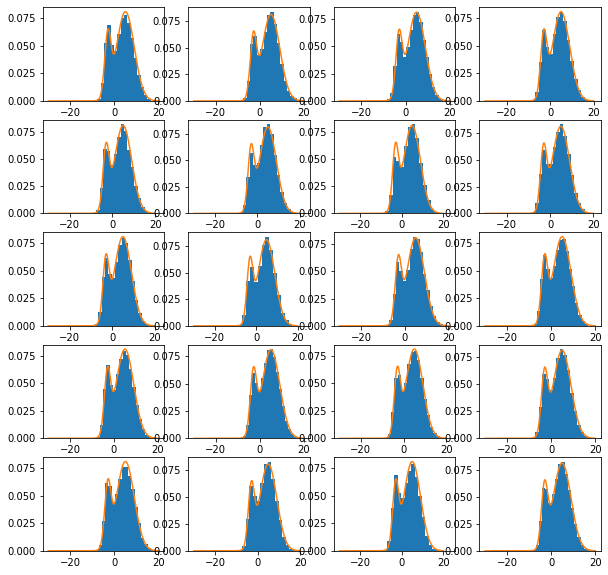

In [48]:
fig = plt.figure(figsize=(10, 10))
index = 0
y_0s = np.arange(-10, 11, 1)
for i,y_0 in enumerate(y_0s):
    fig.add_subplot(5,4,i+1)

    f = lambda s: 4 * np.exp((-(s+3)**2)/4) + 6 * np.exp((-(s-5)**2)/32)
    var = 1
    y_0 = y_0
    n = 10**5
    b = 10**5

    y = Normal(f, var, y_0, b, n)
    
    plt.hist(y, bins=20, density=True)
    
    Z=74
    
    x = np.linspace(-30, 20, 200)
    plt.plot(x, f(x)/z)

ValueError: num must be 1 <= num <= 20, not 21

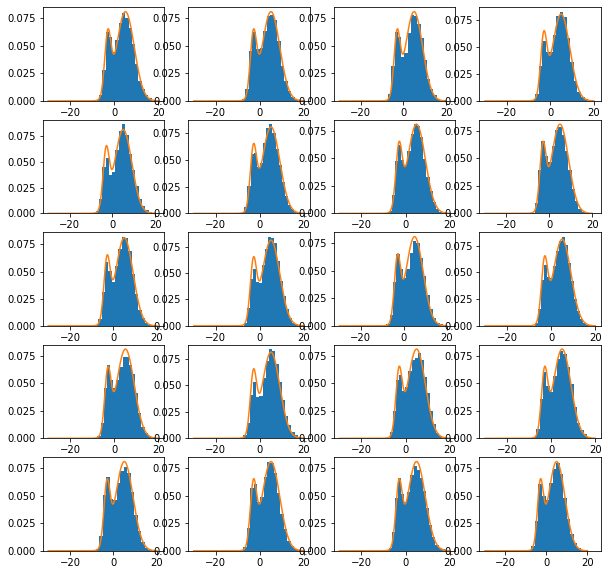

In [49]:
fig = plt.figure(figsize=(10, 10))
index = 0
y_0s = np.arange(-10, 11, 1)
for i,y_0 in enumerate(y_0s):
    fig.add_subplot(5,4,i+1)

    f = lambda s: 4 * np.exp((-(s+3)**2)/4) + 6 * np.exp((-(s-5)**2)/32)
    var = 1
    y_0 = y_0
    n = 10**5
    b = 10**5
    L = 1

    y = Uniform(f, y_0, L, b, n)
    
    plt.hist(y, bins=20, density=True)
    
    Z=74
    
    x = np.linspace(-30, 20, 200)
    plt.plot(x, f(x)/Z)